In [1]:
from arcgis.gis import GIS, Layer
from IPython.display import display

In [2]:
gis = GIS()

In [3]:
map = gis.map("Rocky Mountain National Park")

In [4]:
rmnp_group = gis.groups.search('title:Rocky Mountain National Park Open Data', max_groups=1)[0]
for item in rmnp_group.content()[:3]:
    display(item)

<Item title:"Backcountry Campsites for 2017" type:Feature Layer Collection owner:romo_gis>

<Item title:"Rocky Mountain National Park - Backcountry Mgt Zones" type:Feature Layer Collection owner:imrgis_nps>

<Item title:"Rocky Mountain National Park - Backcountry Place Names" type:Feature Layer Collection owner:imrgis_nps>

In [5]:
trail_search = gis.content.search('title:Rocky Mountain National Park - Trails owner:imrgis_nps')
trailheads = trail_search[0]
trails = trail_search[1]

In [6]:
campsites = gis.content.search('title:Backcountry Campsites for 2017')[0]

In [7]:
map.add_layer(trailheads)
map.add_layer(trails)
map.add_layer(campsites)

In [8]:
# from arcgis.widgets import MapView
# MapView.set_js_cdn("http://js.arcgis.com/4.X/")

In [9]:
map

MapView(layout=Layout(height='400px', width='100%'))

## Trail Lengths

In [10]:
import pandas as pd

In [11]:
trails_df = pd.DataFrame.spatial.from_layer(trails.layers[0])
display(trails_df.head())

,OBJECTID,POINAME,POITYPE,FEE,STEWARD,DATAOWNER,NOTES,Parking,PUBLICDISPLAY,DATAACCESS,...,GROUPNAME,GEOMETRYID,MAINTAINER,ISEXTANT,FACLOCID,FACASSETID,FEATUREID,SEASONAL,SEASDESC,SHAPE
0,1,Endovalley,Trailhead,Park Entrance/Pay.gov,https://www.nps.gov/romo/planyourvisit/fees.htm,Rocky Mountain National Park,,Yes,Public Map Display,Unrestricted,...,N/A,{D5EA2CB8-693E-4DB9-8640-1121D8533376},National Park Service,True,None,None,None,None,None,"{""x"": 446979.7008999996, ""y"": 4472887.21859999..."
1,2,Lawn Lake,Trailhead,Park Entrance/Pay.gov,https://www.nps.gov/romo/planyourvisit/fees.htm,Rocky Mountain National Park,,Yes,Public Map Display,Unrestricted,...,N/A,{8FD29A28-0EAF-499F-A605-A7DA2FCFA614},National Park Service,True,None,None,None,None,None,"{""x"": 446854.21920000017, ""y"": 4473141.7393, ""..."
2,3,East Alluvial Fan,Trailhead,Park Entrance/Pay.gov,https://www.nps.gov/romo/planyourvisit/fees.htm,Rocky Mountain National Park,,Yes,Public Map Display,Unrestricted,...,N/A,{70189ADA-C838-4A24-850E-2AB3EBA97923},National Park Service,True,None,None,None,None,None,"{""x"": 446381.15029999986, ""y"": 4473450.2129999..."
3,4,West Alluvial Fan,Trailhead,Park Entrance/Pay.gov,https://www.nps.gov/romo/planyourvisit/fees.htm,Rocky Mountain National Park,,Yes,Public Map Display,Unrestricted,...,N/A,{B43B170A-B66A-4004-A782-CBFF02F25372},National Park Service,True,None,None,None,None,None,"{""x"": 445912.7851999998, ""y"": 4473549.0579, ""s..."
4,5,Abandoned Beaver Ponds,Trailhead,Park Entrance/Pay.gov,https://www.nps.gov/romo/planyourvisit/fees.htm,Rocky Mountain National Park,,Yes,Public Map Display,Unrestricted,...,N/A,{B6A435BD-465C-4B50-9D9F-DB9B23068E43},National Park Service,True,None,None,None,None,None,"{""x"": 445593.57100000046, ""y"": 4472250.3532, ""..."


<class 'arcgis.features.geo._accessor.GeoAccessor'>


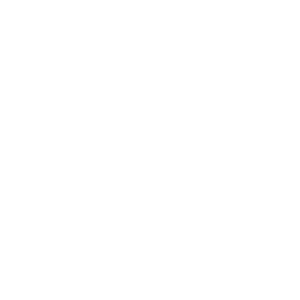

In [12]:
print(type(trails_df.spatial))
display(trails_df.spatial)

<class 'arcgis.geometry._types.Point'>


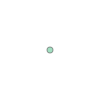

In [13]:
trails_df_row0 = trails_df.iloc[0].SHAPE
print(type(trails_df_row0))
display(trails_df_row0)

In [14]:
trails_df_row0.length

0.0